<a href="https://colab.research.google.com/github/udlbook/udlbook/blob/main/Trees/LinearRegression_FitModel_Quadratic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fitting 1D quadratic model

This notebook fits the quadratic model using coordinate descent.

The code is complete (i.e., there is no work for you to to), but take a look at it and run the code to see the model training.

You can save a local copy of this notebook in your Google account and work through it in Colab (recommended) or you can download the notebook and run it locally using Jupyter notebook or similar.  

Contact me at iclimbtreesmail@gmail.com if you find any mistakes or have any suggestions.

In [ ]:
# Math library
import numpy as np
# Plotting library
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
# Time library
import time
# Used to update figures
from IPython import display

In [ ]:
# Create the same input / output data as used in the unit
x = np.array([0.03, 0.19, 0.34, 0.46, 0.78, 0.81, 1.08, 1.18, 1.39, 1.60, 1.65, 1.90])
y = np.array([0.67, 0.85, 1.05, 1.0, 1.40, 1.5, 1.3, 1.54, 1.55, 1.68, 1.73, 1.6 ])

# Quadratic model

Now let's consider fitting a more complex model.  The quadratic model is defined as:

$$ \textrm{f}[x] = \phi_0+\phi_1 x+ \phi_2 x^2$$

and has three parameters $\phi_0, \phi_1, \phi_2$

In [ ]:
# Model definition
def f_quad(x, phi0, phi1, phi2):
    return phi0 + phi1 * x + phi2 * x * x

# Function to calculate the loss
def compute_loss_quad(x,y,f,phi0,phi1,phi2):

  signed_distance = f(x,phi0,phi1,phi2)-y
  loss = np.sum(signed_distance * signed_distance)

  return loss

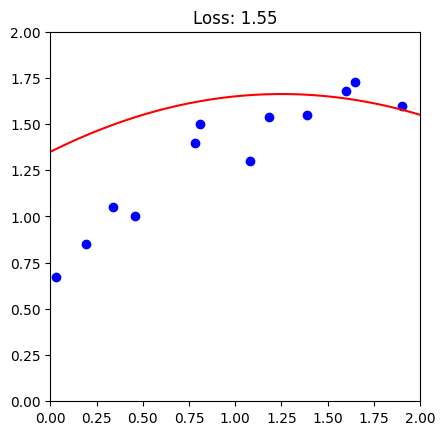

In [ ]:
# Draw this model for some values
phi0 = 1.35
phi1 = 0.5
phi2 = -0.2

fig,ax = plt.subplots()
x_plot = np.linspace(0,2,100)
ax.plot(x,y,'bo')
ax.plot(x_plot,f_quad(x_plot, phi0, phi1, phi2), 'r-')
ax.set_xlim(0,2)
ax.set_ylim(0,2)
ax.set_title('Loss: {:.2f}'.format(compute_loss_quad(x,y,f_quad,phi0,phi1,phi2)))
ax.set_aspect('equal', adjustable='box')
plt.show()

# Fit the model

We'll fit the model using a version of coordinate descent. We first choose a step size $\alpha$ and then we alternate between updating the intercept parameter $\phi_0$ and the slope parameters $\phi_1$ and $\phi_2$.  

1.  Compare the loss for models with $[\phi_0, \phi_1, \phi_2]$,  $[\phi_0+\alpha, \phi_1,\phi_2]$,  and $[\phi_0-\alpha, \phi_1,\phi_2]$. Update the parameters according to the set that have the minimum loss.

2. Compare the loss for models with $[\phi_0, \phi_1, \phi_2]$, $[\phi_0,\phi_1+\alpha, \phi_2]$, and $[\phi_0, \phi_1-\alpha, \phi_2]$.

2. Compare the loss for models with $[\phi_0, \phi_1, \phi_2]$, $[\phi_0,\phi_1, \phi_2+\alpha]$, and $[\phi_0, \phi_1, \phi_2-\alpha]$.

We'll alternate these two steps until we cannot improve any further.

In [ ]:
# Utility function for plotting the three models at each stage
def plot_quad(fig, ax, x,y, f_quad, phi0_1, phi1_1, phi2_1, phi0_2, phi1_2, phi2_2, phi0_3, phi1_3, phi2_3, loss1, loss2, loss3):
    x_plot = np.linspace(0,2,100)
    ax.clear()
    ax.plot(x,y,'bo')
    ax.plot(x_plot,f_quad(x_plot, phi0_1, phi1_1, phi2_1), 'r-')
    ax.plot(x_plot,f_quad(x_plot, phi0_2, phi1_2, phi2_2), 'g-')
    ax.plot(x_plot,f_quad(x_plot, phi0_3, phi1_3, phi2_3), 'b-')
    ax.set_title('Losses: {:.2f} (red), {:.2f} (green), {:.2f} (blue)'.format(loss1, loss2, loss3))
    ax.set_xlim(0,2)
    ax.set_ylim(0,2)
    ax.set_aspect('equal', adjustable='box')

    # Show the figure and wait 0.1 sec
    display.display(fig)
    time.sleep(0.05)
    display.clear_output(wait=True)

In [ ]:
# Fit the quad model
def fit_model_quad(x,y,f_quad,compute_loss_quad,phi0_init, phi1_init, phi2_init, alpha, n_iter):

  # Create figure to display results
  fig,ax = plt.subplots()

  # These two variables to store the evolution of the parameters
  phi0_progress = np.zeros(n_iter)
  phi1_progress = np.zeros(n_iter)
  phi2_progress = np.zeros(n_iter)

  # Initialize the history with the provided values
  phi0_progress[0] = phi0_init
  phi1_progress[0] = phi1_init
  phi2_progress[0] = phi2_init

  # Main iteration loop
  for c_iter in range(1, n_iter):
    # Choose parameters for first model [phi0, phi1, phi2]
    phi0_1 = phi0_progress[c_iter-1]
    phi1_1 = phi1_progress[c_iter-1]
    phi2_1 = phi2_progress[c_iter-1]

    # Change the intercept phi0
    match c_iter%3:
      case 0:
        # Choose parameters for second model [phi_0+alpha, phi1, phi2]
        phi0_2 = phi0_progress[c_iter-1]+alpha
        phi1_2 = phi1_progress[c_iter-1]
        phi2_2 = phi2_progress[c_iter-1]

        # Choose parameters for third model [phi_0+alpha, phi1, phi2]
        phi0_3 = phi0_progress[c_iter-1]-alpha
        phi1_3 = phi1_progress[c_iter-1]
        phi2_3 = phi2_progress[c_iter-1]

      # Change the slope phi1
      case 1:
        # Choose parameters for second model [phi_0, phi1+alpha]
        phi0_2 = phi0_progress[c_iter-1]
        phi1_2 = phi1_progress[c_iter-1]+alpha
        phi2_2 = phi2_progress[c_iter-1]

        # Choose parameters for third model [phi_0, phi1-alpha]
        phi0_3 = phi0_progress[c_iter-1]
        phi1_3 = phi1_progress[c_iter-1]-alpha
        phi2_3 = phi2_progress[c_iter-1]

      # Change the quadratic term phi2
      case 2:
        # Choose parameters for second model [phi_0, phi1+alpha]
        phi0_2 = phi0_progress[c_iter-1]
        phi1_2 = phi1_progress[c_iter-1]
        phi2_2 = phi2_progress[c_iter-1]+alpha

        # Choose parameters for third model [phi_0, phi1-alpha]
        phi0_3 = phi0_progress[c_iter-1]
        phi1_3 = phi1_progress[c_iter-1]
        phi2_3 = phi2_progress[c_iter-1]-alpha

    # Compute the loss for all three models
    loss1 = compute_loss_quad(x,y,f_quad, phi0_1, phi1_1, phi2_1)
    loss2 = compute_loss_quad(x,y,f_quad, phi0_2, phi1_2, phi2_2)
    loss3 = compute_loss_quad(x,y,f_quad, phi0_3, phi1_3, phi2_3)

    # Set the parameters to the whichever model has the lowest loss
    match np.argmin(np.array([loss1, loss2, loss3]))+1:
      case 1:
        phi0_progress[c_iter] = phi0_1
        phi1_progress[c_iter] = phi1_1
        phi2_progress[c_iter] = phi2_1
      case 2:
        phi0_progress[c_iter] = phi0_2
        phi1_progress[c_iter] = phi1_2
        phi2_progress[c_iter] = phi2_2
      case 3:
        phi0_progress[c_iter] = phi0_3
        phi1_progress[c_iter] = phi1_3
        phi2_progress[c_iter] = phi2_3


    # Plot the progress
    plot_quad(fig, ax, x,y, f_quad,  phi0_1, phi1_1, phi2_1, phi0_2, phi1_2, phi2_2, phi0_3, phi1_3, phi2_3, loss1, loss2, loss3)

  return phi0_progress, phi1_progress, phi2_progress

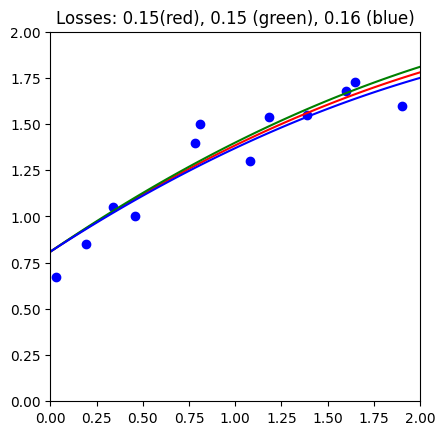

In [ ]:
# Run the fitting algorithm
phi0_progress, phi1_progress, phi2_progress = fit_model_quad(x,y,f_quad,compute_loss_quad,phi0_init=1.35, phi1_init=-0.55, phi2_init = 0, alpha=0.015, n_iter=275)

You can see that this takes a lot longer than for the simple linear regression model, but the final loss of 0.15 is less than the best we could achieve with that model (which was around 0.20).  Adding the quadratic term which allows the function to "bend" improves the fit.